Librairies

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib 
import xgboost as xgb
from sklearn.metrics import classification_report

Import data

In [28]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
df = pd.concat([train, test])

In [100]:
data = df.copy()


# On enlève valeurs aberrantes
data = data[data["Surface_habitable_logement"]<=100000]
data = data[data['Conso_5_usages/m²_é_finale']<=100000]
data = data[data['Hauteur_sous-plafond'] < 10]

data

,Unnamed: 0,N°DPE,Configuration_installation_chauffage_n°2,Facteur_couverture_solaire_saisi,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Cage_d'escalier,Conso_5_usages_é_finale_énergie_n°2,Type_générateur_froid,Type_émetteur_installation_chauffage_n°2,...,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Qualité_isolation_plancher_haut_comble_perdu,Qualité_isolation_plancher_haut_toit_terrase,Surface_habitable_immeuble,Surface_habitable_logement,Type_bâtiment
0,0,2125E0981916Z,NaN,NaN,110.4,28.3,NaN,10676.1,NaN,NaN,...,insuffisante,bonne,insuffisante,très bonne,NaN,insuffisante,NaN,220.8,220.8,appartement
1,1,2244E1531282F,Installation de chauffage simple,NaN,83.5,10.6,NaN,8678.1,PAC air/air installée à partir de 2015,"Convecteur électrique NFC, NF** et NF***",...,insuffisante,moyenne,insuffisante,insuffisante,NaN,insuffisante,NaN,NaN,83.5,maison
2,2,2335E0208920V,NaN,NaN,68.0,8.9,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,bonne,NaN,très bonne,NaN,NaN,68.0,maison
3,3,2144E0974339H,NaN,NaN,NaN,1.8,NaN,2576.8,NaN,NaN,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,3292.3,47.5,appartement
4,4,2228E2613102B,NaN,NaN,142.5,18.6,NaN,852.8,PAC air/air installée entre 2008 et 2014,NaN,...,insuffisante,insuffisante,insuffisante,moyenne,NaN,insuffisante,NaN,NaN,142.5,maison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2999995,2250E2261336L,NaN,NaN,80.6,10.5,NaN,NaN,NaN,NaN,...,insuffisante,bonne,insuffisante,insuffisante,NaN,très bonne,NaN,NaN,80.6,maison
499996,2999996,2292E0189722P,NaN,NaN,37.0,4.8,NaN,NaN,NaN,NaN,...,insuffisante,moyenne,insuffisante,très bonne,NaN,très bonne,NaN,1000.0,37.0,appartement
499997,2999997,2284E0314978V,NaN,NaN,78.3,10.7,NaN,NaN,NaN,NaN,...,bonne,bonne,bonne,très bonne,NaN,moyenne,NaN,NaN,78.3,appartement
499998,2999998,2238E1671131U,NaN,NaN,51.4,6.6,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,insuffisante,NaN,très bonne,NaN,NaN,51.4,appartement


Traitement data

In [101]:
# Séparer les variables numériques
numerical_vars = data.select_dtypes(include=['int64', 'float64'])

# Séparer les variables qualitatives/catégorielles
categorical_vars = data.select_dtypes(include=['object', 'category'])

In [102]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne quanti
na_percentage = numerical_vars.isna().mean().round(4)*100

# Afficher le pourcentage de NA par colonne
print(na_percentage.sort_values())

Unnamed: 0                                               0.00
Hauteur_sous-plafond                                     0.00
Conso_5_usages_é_finale                                  0.00
Conso_5_usages/m²_é_finale                               0.00
Code_postal_(brut)                                       0.00
Surface_habitable_logement                               0.00
Emission_GES_éclairage                                   0.00
Code_postal_(BAN)                                        0.49
Conso_chauffage_dépensier_installation_chauffage_n°1    13.77
Surface_habitable_desservie_par_installation_ECS        14.14
Année_construction                                      26.45
Coût_chauffage_énergie_n°2                              40.60
Conso_5_usages_é_finale_énergie_n°2                     40.60
Emission_GES_chauffage_énergie_n°2                      40.60
Surface_habitable_immeuble                              71.50
Facteur_couverture_solaire                              98.92
Surface_

In [103]:
cols_to_drop = na_percentage[na_percentage>10].index

data = data.drop(cols_to_drop, axis=1)
numerical_vars = numerical_vars.drop(cols_to_drop, axis=1)

data = data.drop(["Unnamed: 0","Code_postal_(BAN)","Conso_5_usages_é_finale","Code_postal_(brut)","Emission_GES_éclairage"], axis=1)
numerical_vars = numerical_vars.drop(["Unnamed: 0","Code_postal_(BAN)","Conso_5_usages_é_finale","Code_postal_(brut)","Emission_GES_éclairage"], axis=1)

for col in numerical_vars :
    data[col] = data[col].fillna(data[col].mean())

In [104]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne quanti
na_percentage_categorical = categorical_vars.isna().mean().round(4)*100

# Afficher le pourcentage de NA par colonne
print(na_percentage_categorical.sort_values())

N°DPE                                                     0.00
Qualité_isolation_menuiseries                             0.00
Qualité_isolation_enveloppe                               0.00
Etiquette_DPE                                             0.00
Etiquette_GES                                             0.00
Type_bâtiment                                             0.00
Nom__commune_(Brut)                                       0.01
Qualité_isolation_murs                                    0.06
Code_INSEE_(BAN)                                          0.48
N°_département_(BAN)                                      0.62
Classe_altitude                                           1.48
Qualité_isolation_plancher_bas                            9.09
Qualité_isolation_plancher_haut_comble_perdu             47.31
Qualité_isolation_plancher_haut_comble_aménagé           81.82
Qualité_isolation_plancher_haut_toit_terrase             86.01
Type_émetteur_installation_chauffage_n°2               

In [105]:
cols_to_drop_cat = na_percentage_categorical[na_percentage_categorical>10].index

data = data.drop(cols_to_drop_cat, axis=1)
categorical_vars = categorical_vars.drop(cols_to_drop_cat, axis=1)

data = data.drop(["N°DPE","Code_INSEE_(BAN)","Qualité_isolation_plancher_bas","Nom__commune_(Brut)"], axis=1)
categorical_vars = categorical_vars.drop(["N°DPE","Code_INSEE_(BAN)","Qualité_isolation_plancher_bas","Nom__commune_(Brut)"], axis=1)

for col in categorical_vars:
    data[col] = data[col].fillna(0)

In [106]:
numerical_vars.columns

Index(['Conso_5_usages/m²_é_finale', 'Hauteur_sous-plafond',
       'Surface_habitable_logement'],
      dtype='object')

In [107]:
categorical_vars.columns

Index(['Etiquette_GES', 'Classe_altitude', 'Etiquette_DPE',
       'N°_département_(BAN)', 'Qualité_isolation_enveloppe',
       'Qualité_isolation_menuiseries', 'Qualité_isolation_murs',
       'Type_bâtiment'],
      dtype='object')

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

Modélisation XGBoost

In [ ]:
# Assurez-vous d'abord que 'Etiquette_DPE' est dans les colonnes
if 'Etiquette_DPE' in data.columns:
    # Variables cibles et autres caractéristiques
    y = data['Etiquette_DPE'].astype("category").cat.codes
    X = data.drop(['Etiquette_DPE'], axis=1)

    # Encode les variables pour le modèle
    for column in X.columns:
        X[column] = X[column].astype("category").cat.codes

    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle d'arbre de décision
    model = xgb.XGBClassifier(num_class=7, n_estimators=100, learning_rate=0.1, max_depth=6)
    model.fit(X_train, y_train)

    # Évaluation
    y_pred = model.predict(X_test)
    train_accuracy = model.score(X_train, y_train)
    print("Training Accuracy:", train_accuracy)

    print("Validation Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print("y_test :", y_test.value_counts())
    print("y_pred :", pd.Series(y_pred).value_counts())
else:
    print("La colonne 'Etiquette_DPE' n'est pas dans les données.")

In [115]:
data_val = pd.read_csv("data/val.csv")

In [116]:
data_val = data_val.drop(cols_to_drop, axis=1)
data_val = data_val.drop(cols_to_drop_cat, axis=1)
data_val = data_val.drop(["Code_INSEE_(BAN)", "Code_postal_(BAN)", "N°DPE","Conso_5_usages_é_finale","Qualité_isolation_plancher_bas","Code_postal_(brut)",
                          "Nom__commune_(Brut)","Emission_GES_éclairage"], axis=1)

for column in data_val.columns:
        data_val[column] = data_val[column].astype("category").cat.codes

prediction_val = model.predict(data_val)

In [117]:
# Supposons que 'model' et 'prediction_val' sont définis précédemment dans votre code
joblib.dump(model, "model/model_metier_XGBoost_15.sav")

# Convertissez les prédictions en DataFrame et changez le type de données en 'object'
prediction = pd.DataFrame(prediction_val, columns=['Etiquette_DPE']).astype(object)

# Remplacez les valeurs numériques par des lettres correspondant à l'étiquette DPE
mapping = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}
prediction['Etiquette_DPE'] = prediction['Etiquette_DPE'].replace(mapping)

# Affichez les fréquences des étiquettes DPE prédites
print(prediction['Etiquette_DPE'].value_counts())

# Créez un DataFrame pour la soumission
df_soumission = pd.DataFrame()
data_soumission = pd.read_csv("data/val.csv")

# Assurez-vous que "N°DPE" est une colonne dans votre CSV
df_soumission["N°DPE"] = data_soumission["N°DPE"]
df_soumission["Etiquette_DPE"] = prediction['Etiquette_DPE']
df_soumission.to_csv("prediction/model_metier_XGBoost_15.csv", index=False)

Etiquette_DPE
D    89642
C    69439
E    66086
F    40946
G    25894
B     6030
A     2332
Name: count, dtype: int64


Interprétation

Feature ranking:
1. feature Etiquette_GES (0.5232)
2. feature Conso_5_usages/m²_é_finale (0.3645)
3. feature Type_bâtiment (0.0400)
4. feature Surface_habitable_logement (0.0256)
5. feature Classe_altitude (0.0189)
6. feature Hauteur_sous-plafond (0.0189)
7. feature N°_département_(BAN) (0.0088)


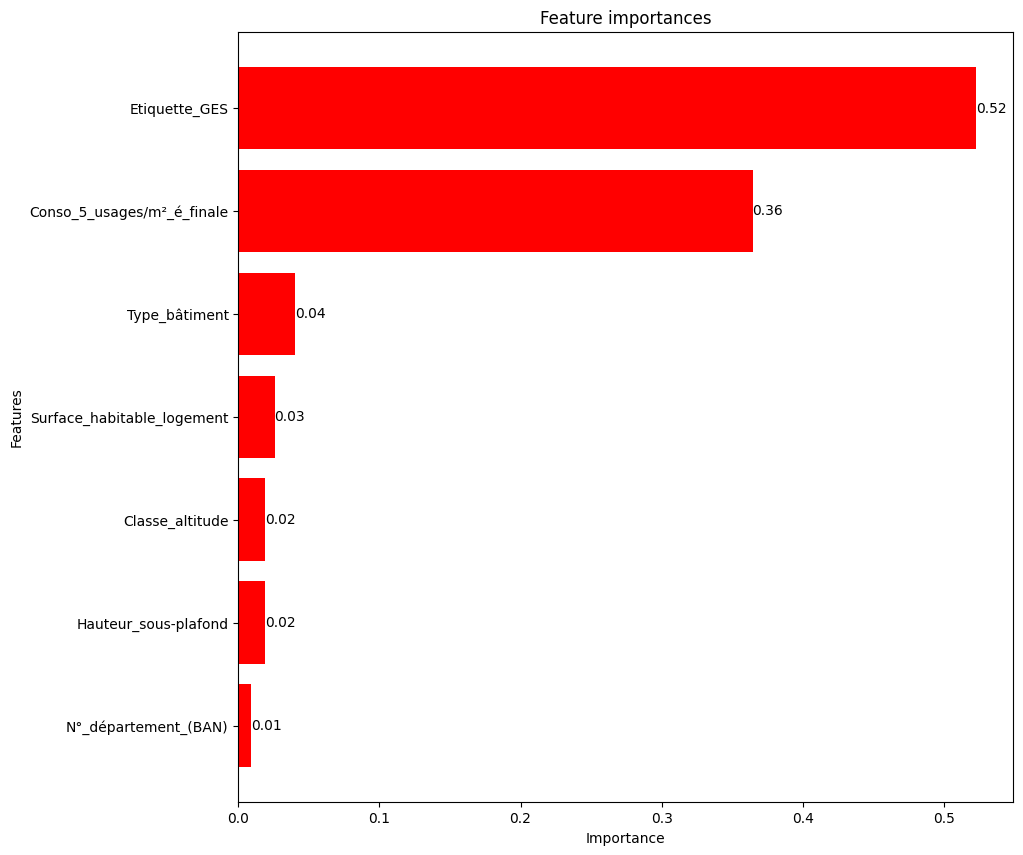

In [118]:
# Récupérer l'importance des caractéristiques
importances = model.feature_importances_

# Trier les caractéristiques par importance
indices = np.argsort(importances)[::-1]

# Afficher le classement des caractéristiques
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Tracer l'importance des caractéristiques dans un graphique à barres horizontales
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
bars = plt.barh(range(X_train.shape[1]), importances[indices], color="r", align="center")

# Ajouter des étiquettes pour chaque barre
for bar in bars:
    plt.text(
        bar.get_width(),  # Position x de l'étiquette
        bar.get_y() + bar.get_height() / 2,  # Position y de l'étiquette
        f'{bar.get_width():.2f}',  # Valeur de l'étiquette
        va='center',  # Centrer verticalement
        ha='left'  # Aligner horizontalement à gauche
    )

plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.gca().invert_yaxis()  # Inverser l'axe y
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [119]:
for col in X_train.columns:
    print(col)

Etiquette_GES
Classe_altitude
Conso_5_usages/m²_é_finale
Hauteur_sous-plafond
N°_département_(BAN)
Surface_habitable_logement
Type_bâtiment


Hyperparamétrage